# 1. Introduction & Setup
## Loading Libraries
This section loads essential libraries for data manipulation and analysis.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Listing Input Files
This code snippet lists all files available in the input directory, typically containing the competition datasets.

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


# 2. Data Loading and Initial Exploration
This section focuses on loading the training and test datasets and performing initial data inspections.

## Loading Training Data
Loads the train.csv file into a pandas DataFrame and displays the first 5 rows.

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s5e5/train.csv')
train.head(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


## Training Data Information
Provides a summary of the training DataFrame, including column data types, non-null counts, and memory usage.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


## Checking for Missing Values in Training Data
This loop iterates through each column in the training DataFrame and prints the percentage of missing values.

In [5]:
for col in train.columns:
    missing_rate = train[col].isnull().mean() * 100
    print(f"{col}: {missing_rate:.2f}%")

id: 0.00%
Sex: 0.00%
Age: 0.00%
Height: 0.00%
Weight: 0.00%
Duration: 0.00%
Heart_Rate: 0.00%
Body_Temp: 0.00%
Calories: 0.00%


## Loading Test Data
Loads the test.csv file into a pandas DataFrame and displays the first 5 rows.

In [6]:
test = pd.read_csv('/kaggle/input/playground-series-s5e5/test.csv')
test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


## Test Data Information
Provides a summary of the test DataFrame, including column data types, non-null counts, and memory usage.

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.3+ MB


## Training Data Descriptive Statistics
Generates descriptive statistics of the numerical columns in the training DataFrame, such as count, mean, standard deviation, min, max, and quartiles.

In [8]:
train.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# 3. Feature Engineering
This section involves creating new features from the existing ones to potentially improve model performance.

## Encoding 'Sex' Column
Converts the categorical 'Sex' column into a numerical format ('Sex_encoded') using Label Encoding, which is necessary for most machine learning models.

In [9]:
from sklearn.preprocessing import LabelEncoder

if 'Sex' in train.columns:
    le = LabelEncoder()
    train['Sex_encoded'] = le.fit_transform(train['Sex'])
    print(train[['Sex', 'Sex_encoded']].head())
else:
    pass

      Sex  Sex_encoded
0    male            1
1  female            0
2  female            0
3    male            1
4  female            0


## Calculating BMI (Body Mass Index)
Calculates the Body Mass Index (BMI) using the 'Weight' and 'Height' columns and adds it as a new column to the DataFrame.

In [10]:
train['BMI'] = train['Weight'] / ((train['Height'] / 100) ** 2)
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex_encoded,BMI
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,1,22.955684
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,0,22.582709
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,0,24.690405
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,1,24.414062
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,0,22.136740


## Creating Interaction Features
Creates two new features:

- `HRxDuration`: The product of 'Heart_Rate' and 'Duration'.
- `Duration_Temp`: The ratio of 'Duration' to 'Body_Temp', handling potential division by zero by replacing zero 'Body_Temp' values with np.nan.

In [11]:
import numpy as np

train['HRxDuration'] = train['Heart_Rate'] * train['Duration']

# Avoid division by zero if 'Body_Temp' contains zero values
train['Duration_Temp'] = train['Duration'] / train['Body_Temp'].replace(0, np.nan)

train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex_encoded,BMI,HRxDuration,Duration_Temp
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,1,22.955684,2626.0,0.634146
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,0,22.582709,680.0,0.201511
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,0,24.690405,588.0,0.175879
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,1,24.414062,2625.0,0.614251
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,0,22.136740,2550.0,0.615764


## Outlier Handling
This code identifies and removes outliers for 'Height', 'Weight', 'Body_Temp', and 'Heart_Rate' columns based on the Interquartile Range (IQR) method.

In [12]:
cols = ['Height', 'Weight', 'Body_Temp', 'Heart_Rate']

for col in cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    train = train[(train[col] >= Q1) & (train[col] <= Q3)]

## Calculating BMR (Basal Metabolic Rate)
Defines a function to calculate Basal Metabolic Rate (BMR) based on the Mifflin-St Jeor equation, considering sex, weight, height, and age. This function is then applied to create a new 'BMR' column.

In [13]:
def calculate_bmr(row):
    if row['Sex_encoded'] == 1:  # Male (assuming 1 is male after encoding)
        return 66.47 + (13.75 * row['Weight']) + (5 * row['Height']) - (6.76 * row['Age'])
    else:  # Female (assuming 0 is female)
        return 655.1 + (9.56 * row['Weight']) + (1.85 * row['Height']) - (4.68 * row['Age'])

train['BMR'] = train.apply(calculate_bmr, axis=1)

print(train[['Sex_encoded', 'Age', 'Height', 'Weight', 'BMR']].head())

    Sex_encoded  Age  Height  Weight      BMR
22            1   32   177.0    78.0  1807.65
64            1   31   177.0    78.0  1814.41
68            1   21   171.0    77.0  1838.26
72            0   23   173.0    70.0  1536.71
79            1   62   177.0    80.0  1632.35


## Classifying Obesity Status based on BMI
Defines a function classify_obesity to categorize individuals into 'Obese', 'Overweight', or 'Normal' based on their BMI values. A new column Obesity_Status is then added to the DataFrame.

In [14]:
# Classify obesity by BMI
def classify_obesity(bmi):
    if bmi >= 30:
        return 'Obese'
    elif bmi >= 25:
        return 'Overweight'
    else:
        return 'Normal'

# Add column
train['Obesity_Status'] = train['BMI'].apply(classify_obesity)

## Estimating Body Fat Percentage
Defines a function to estimate body fat percentage using a formula that considers BMI, age, and sex. A new column Body_Fat_Percentage_Est is then added to the DataFrame.

In [15]:
def estimate_body_fat_percentage(row):
    age = row['Age']
    bmi = row['BMI']
    sex_encoded = row['Sex_encoded'] # 0 for Female, 1 for Male

    # Calculate body fat percentage
    if sex_encoded == 1: # Male
        return (1.20 * bmi) + (0.23 * age) - 16.2
    else: # Female
        return (1.20 * bmi) + (0.23 * age) - 5.4

train['Body_Fat_Percentage_Est'] = train.apply(estimate_body_fat_percentage, axis=1)

print(train[['BMI', 'Obesity_Status', 'Body_Fat_Percentage_Est']].head())

          BMI Obesity_Status  Body_Fat_Percentage_Est
22  24.897060         Normal                21.036472
64  24.897060         Normal                20.806472
68  26.332889     Overweight                20.229467
72  23.388687         Normal                27.956424
79  25.535446     Overweight                28.702536


## Obesity Status Distribution
Prints the value counts for the Obesity_Status column, showing the distribution of different obesity categories in the training data.

In [16]:
print("\nObesity Status Distribution:")
print(train['Obesity_Status'].value_counts())


Obesity Status Distribution:
Obesity_Status
Normal        48753
Overweight    15269
Name: count, dtype: int64


# 4. Correlation Analysis
This section analyzes the correlation between numerical features and the target variable 'Calories'.

## Correlation with 'Calories'
Calculates the correlation matrix for numerical columns in the training data and then specifically displays the correlation values with the 'Calories' column, sorted in descending order.

In [17]:
## Correlation
# Only numerical columns

import numpy as np
df_numeric = train.select_dtypes(include=np.number)
c = df_numeric.corr().round(2)['Calories']
print(c.sort_values(ascending=False))

Calories                   1.00
HRxDuration                0.94
Duration                   0.92
Duration_Temp              0.92
Body_Temp                  0.73
Heart_Rate                 0.61
Age                        0.21
Body_Fat_Percentage_Est    0.20
id                         0.00
BMI                       -0.01
Height                    -0.06
Weight                    -0.07
Sex_encoded               -0.11
BMR                       -0.19
Name: Calories, dtype: float64


In [18]:
c = df_numeric.corr().round(2)['Calories']
print(c.sort_values(ascending=False))

Calories                   1.00
HRxDuration                0.94
Duration                   0.92
Duration_Temp              0.92
Body_Temp                  0.73
Heart_Rate                 0.61
Age                        0.21
Body_Fat_Percentage_Est    0.20
id                         0.00
BMI                       -0.01
Height                    -0.06
Weight                    -0.07
Sex_encoded               -0.11
BMR                       -0.19
Name: Calories, dtype: float64


# 5. Model Training
This section sets up and trains an XGBoost regression model to predict calorie expenditure.

## Reloading Data and Feature Engineering Function
Reloads the original training and test datasets to ensure a clean start for model training and re-defines the add_features function to apply all the previously engineered features.

In [19]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder

# Reload data
df = pd.read_csv('/kaggle/input/playground-series-s5e5/train.csv')  # Training data
test_df = pd.read_csv('/kaggle/input/playground-series-s5e5/test.csv')  # Test data

# Initialize LabelEncoder (initialized outside add_features function for consistency)
le = LabelEncoder()

# Feature Engineering
def add_features(df):
    df = df.copy()
    df['Sex_encoded'] = le.fit_transform(df['Sex'])

    df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)
    df['HRxDuration'] = df['Heart_Rate'] * df['Duration']
    # Handle cases where Body_Temp is 0 by replacing with the mean (more robust handling than np.nan)
    df['Duration_Temp'] = df['Duration'] / df['Body_Temp'].replace(0, df['Body_Temp'].mean())

    def calculate_bmr(row):
        if row['Sex_encoded'] == 1:  # Male
            return 66.47 + (13.75 * row['Weight']) + (5 * row['Height']) - (6.76 * row['Age'])
        else:  # Female
            return 655.1 + (9.56 * row['Weight']) + (1.85 * row['Height']) - (4.68 * row['Age'])
    df['BMR'] = df.apply(calculate_bmr, axis=1)

    def estimate_body_fat_percentage(row):
        age = row['Age']
        bmi = row['BMI']
        sex_encoded = row['Sex_encoded'] # 0 for Female, 1 for Male
        if sex_encoded == 1: # Male
            return (1.20 * bmi) + (0.23 * age) - 16.2
        else: # Female
            return (1.20 * bmi) + (0.23 * age) - 5.4
    df['Body_Fat_Percentage_Est'] = df.apply(estimate_body_fat_percentage, axis=1)

    # Handle cases where Duration is 0 (to avoid division by zero)
    df['HR_per_Minute'] = df['Heart_Rate'] / df['Duration'].replace(0, 1) # Replace 0 with 1 to prevent division by zero

    # Add new features: interaction and polynomial features
    df['Age_BMI_Interaction'] = df['Age'] * df['BMI']
    df['HeartRate_Temp_Interaction'] = df['Heart_Rate'] * df['Body_Temp']
    df['Duration_Squared'] = df['Duration'] ** 2
    df['Age_Squared'] = df['Age'] ** 2

    return df

## Applying Feature Engineering
Applies the add_features function to both the training and test DataFrames.

In [20]:
# Apply derived features to training and test data
df = add_features(df)
test_df = add_features(test_df)

## Defining Features and Target Variable
Selects the features to be used for model training and applies a log transformation (`np.log1p`) to the target variable 'Calories' to handle skewed distributions and improve model performance.

In [21]:
# Update list of features to use (including added features)
selected_features = [
    'HRxDuration',
    'Duration_Temp',
    'Duration',
    'Body_Temp',
    'Heart_Rate',
    'Age',
    'Body_Fat_Percentage_Est',
    'HR_per_Minute',
    'Age_BMI_Interaction',          # New feature
    'HeartRate_Temp_Interaction',   # New feature
    'Duration_Squared',             # New feature
    'Age_Squared',                  # New feature
    'Weight',                       # Added Weight
    'Height',                       # Added Height
    'BMI',                          # Added BMI
    'BMR',                          # Added BMR
    'Sex_encoded'                   # Added Sex_encoded
]

# Log transform the target variable
X = df[selected_features]
y = np.log1p(df['Calories'])

## Data Splitting
Splits the prepared data into training and validation sets for model training and evaluation.

In [22]:
# Data splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBoost Model Definition and Training
Defines an XGBoost Regressor model with optimized hyperparameters and trains it using the training data, with a validation set for early stopping.

In [23]:
# Define and train XGBoost model (attempting hyperparameter tuning)
base_score = y_train.mean()

model = XGBRegressor(
    n_estimators=2000,          # Increased n_estimators
    learning_rate=0.03,         # Decreased learning_rate
    max_depth=6,                # Adjusted max_depth
    subsample=0.7,              # Adjusted subsample
    colsample_bytree=0.7,       # Adjusted colsample_bytree
    gamma=0.1,                  # Added gamma
    reg_alpha=0.005,            # Added L1 regularization
    reg_lambda=0.8,             # Added L2 regularization
    random_state=42,
    early_stopping_rounds=100,  # Increased early_stopping_rounds
    eval_metric='rmsle',
    base_score=base_score,
    n_jobs=-1                   # Use all cores
)

print("Starting model training")
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=100)
print("Model training completed")

Starting model training
[0]	validation_0-rmsle:0.21009
[100]	validation_0-rmsle:0.02325
[200]	validation_0-rmsle:0.01771
[300]	validation_0-rmsle:0.01748
[400]	validation_0-rmsle:0.01744
[500]	validation_0-rmsle:0.01744
[600]	validation_0-rmsle:0.01743
[700]	validation_0-rmsle:0.01743
[800]	validation_0-rmsle:0.01743
[895]	validation_0-rmsle:0.01743
Model training completed


## Validation Performance Evaluation
Evaluates the model's performance on the validation set using RMSLE (Root Mean Squared Log Error). The predictions are transformed back from log scale to original scale for evaluation.

In [24]:
# Evaluate validation performance
val_preds_log = model.predict(X_val)
val_preds = np.expm1(val_preds_log) # Transform back from log scale
val_y = np.expm1(y_val) # Transform back from log scale
rmsle = np.sqrt(mean_squared_log_error(val_y, val_preds))
print(f"Validation RMSLE: {rmsle:.4f}")

Validation RMSLE: 0.0605


In [25]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error

# 추가 파생변수 생성 함수
def add_advanced_features(df):
    df = df.copy()
    # 로그, 제곱근, 역수, 다항식, 상호작용
    for col in ['BMI', 'Duration', 'Heart_Rate', 'Body_Temp', 'Age']:
        df[f'{col}_log'] = np.log1p(df[col])
        df[f'{col}_sqrt'] = np.sqrt(df[col])
        df[f'{col}_inv'] = 1 / (df[col] + 1e-3)
        df[f'{col}_squared'] = df[col] ** 2
    # 상호작용
    df['BMI_Age'] = df['BMI'] * df['Age']
    df['BMI_HeartRate'] = df['BMI'] * df['Heart_Rate']
    df['Duration_HeartRate'] = df['Duration'] * df['Heart_Rate']
    df['Temp_HeartRate'] = df['Body_Temp'] * df['Heart_Rate']
    return df

df = add_advanced_features(df)
test_df = add_advanced_features(test_df)

# feature 목록 확장
enhanced_features = selected_features + [
    f'{col}_{suffix}'
    for col in ['BMI', 'Duration', 'Heart_Rate', 'Body_Temp', 'Age']
    for suffix in ['log', 'sqrt', 'inv', 'squared']
] + [
    'BMI_Age', 'BMI_HeartRate', 'Duration_HeartRate', 'Temp_HeartRate'
]

X = df[enhanced_features]
y = np.log1p(df['Calories'])
X_test_pred = test_df[enhanced_features]

# KFold Cross-Validation 및 XGBoost 튜닝
kf = KFold(n_splits=5, shuffle=True, random_state=42)
val_scores = []
models = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    model = XGBRegressor(
        n_estimators=3000,
        learning_rate=0.02,
        max_depth=7,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0.2,
        reg_alpha=0.01,
        reg_lambda=1.0,
        random_state=fold,
        early_stopping_rounds=200,
        eval_metric='rmsle',
        n_jobs=-1
    )
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)
    val_pred = np.expm1(model.predict(X_val))
    val_true = np.expm1(y_val)
    rmsle = np.sqrt(mean_squared_log_error(val_true, val_pred))
    print(f"Fold {fold+1} RMSLE: {rmsle:.4f}")
    val_scores.append(rmsle)
    models.append(model)
print(f"\nAverage CV RMSLE: {np.mean(val_scores):.4f}")

# 앙상블 예측
preds = np.zeros(X_test_pred.shape[0])
for model in models:
    preds += np.expm1(model.predict(X_test_pred)) / len(models)
test_df['Predicted_Calories'] = preds
print(test_df[['Predicted_Calories']].head())

Fold 1 RMSLE: 0.0606
Fold 2 RMSLE: 0.0609
Fold 3 RMSLE: 0.0603
Fold 4 RMSLE: 0.0605
Fold 5 RMSLE: 0.0608

Average CV RMSLE: 0.0606
   Predicted_Calories
0           27.537884
1          108.807392
2           87.686132
3          126.306585
4           75.544891


In [26]:
# Evaluate validation performance
val_preds_log = model.predict(X_val)
val_preds = np.expm1(val_preds_log) # Transform back from log scale
val_y = np.expm1(y_val) # Transform back from log scale
rmsle = np.sqrt(mean_squared_log_error(val_y, val_preds))
print(f"Validation RMSLE: {rmsle:.4f}")

Validation RMSLE: 0.0608


## Training Data Performance Evaluation
Evaluates the model's performance on the training data to check for overfitting.

In [27]:
# Evaluate training data performance (train_score)
train_preds_log = model.predict(X_train)
train_preds = np.expm1(train_preds_log)
train_y = np.expm1(y_train)
train_rmsle = np.sqrt(mean_squared_log_error(train_y, train_preds))
print(f"Training RMSLE: {train_rmsle:.4f}")

Training RMSLE: 0.0578


## Learning Curve Visualization
Plots the training and validation RMSLE scores over epochs to visualize the model's learning progress and identify potential overfitting.

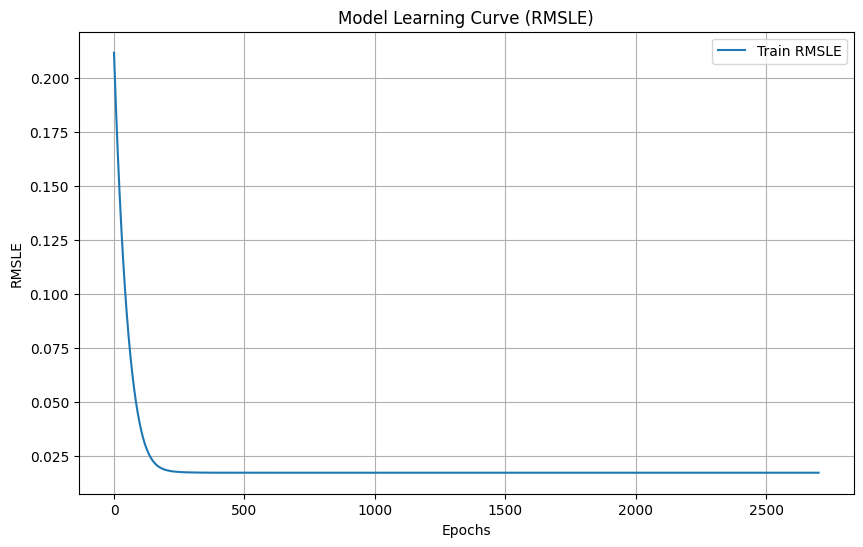

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Training loss (train_score) is model.evals_result()['validation_0']['rmsle']
# Validation loss (test_score) is model.evals_result()['validation_1']['rmsle']
plt.plot(model.evals_result()['validation_0']['rmsle'], label='Train RMSLE') # Check model.evals_result()
plt.title('Model Learning Curve (RMSLE)')
plt.xlabel('Epochs')
plt.ylabel('RMSLE')
plt.legend()
plt.grid(True)
plt.show()

## Add Predictions

In [29]:
df_pred = test_df.copy()
X_test_pred = df_pred[enhanced_features]

test_preds_log = model.predict(X_test_pred)

pred = np.expm1(test_preds_log)

df_pred['Predicted_Calories'] = pred

print("df_pred with 'Predicted_Calories' column:")
print(df_pred.head())

df_pred with 'Predicted_Calories' column:
       id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  750000    male   45   177.0    81.0       7.0        87.0       39.8   
1  750001    male   26   200.0    97.0      20.0       101.0       40.5   
2  750002  female   29   188.0    85.0      16.0       102.0       40.4   
3  750003  female   39   172.0    73.0      20.0       107.0       40.6   
4  750004  female   30   173.0    67.0      16.0        94.0       40.5   

   Sex_encoded        BMI  ...  Body_Temp_squared   Age_log  Age_sqrt  \
0            1  25.854639  ...            1584.04  3.828641  6.708204   
1            1  24.250000  ...            1640.25  3.295837  5.099020   
2            0  24.049344  ...            1632.16  3.401197  5.385165   
3            0  24.675500  ...            1648.36  3.688879  6.244998   
4            0  22.386314  ...            1640.25  3.433987  5.477226   

    Age_inv  Age_squared      BMI_Age  BMI_HeartRate  Duration_Heart

# 6. Submission
This section is for generating the final submission file in the format required by the competition.

## Generating and Saving Submission File
This code block creates a pandas DataFrame with 'id' and 'Calories' columns, where 'id' is a range starting from 750000 and 'Calories' are the predicted values from df_pred['Predicted_Calories']. Finally, it saves this DataFrame to a CSV file named submission.csv without the index.

In [30]:
id = range(750000, 1000000)

df_submit = pd.DataFrame({
    'id': id,
    'Calories': df_pred['Predicted_Calories']
})

print(df_submit.head())

df_submit.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")

       id    Calories
0  750000   27.517773
1  750001  108.543159
2  750002   87.625732
3  750003  126.229202
4  750004   75.246353
Submission file 'submission.csv' created successfully.
